In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
steps_data = pd.read_csv("data/steps.csv", sep=";")
survey_data = pd.read_csv("data/survey.csv")

In [97]:
survey_data.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [98]:
survey_data.describe()

,id,hh_size,education,height,weight
count,929.000000,929.000000,929.000000,928.000000,927.000000
mean,465.000000,2.342304,2.530678,171.668103,72.833873
std,268.323499,1.226129,1.274491,9.080235,25.902717
min,1.000000,1.000000,1.000000,145.000000,6.000000
25%,233.000000,1.000000,1.000000,165.000000,61.000000
50%,465.000000,2.000000,2.000000,172.000000,71.000000
75%,697.000000,3.000000,4.000000,179.000000,81.000000
max,929.000000,11.000000,5.000000,195.000000,700.000000


In [99]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           929 non-null    int64  
 1   city         929 non-null    object 
 2   gender       929 non-null    object 
 3   age          929 non-null    object 
 4   hh_size      929 non-null    int64  
 5   education    929 non-null    int64  
 6   education_1  929 non-null    object 
 7   height       928 non-null    float64
 8   weight       927 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 65.4+ KB


In [100]:
survey_data["age"].value_counts()

25-34    426
35-44    178
45-54    147
<25      125
55-64     46
65+        7
Name: age, dtype: int64

In [101]:
survey_data["hh_size"].value_counts()

2     355
1     252
3     141
4     125
5      50
6       5
11      1
Name: hh_size, dtype: int64

In [102]:
survey_data["education_1"].value_counts()


Master or doctorate    412
Bachelor               357
High school            106
Vocational              40
Primary                 13
No degree                1
Name: education_1, dtype: int64

In [103]:
steps_data.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data cleaning

In [104]:
# Replace zero values to Nan
steps_data.replace(0, np.nan, inplace=True)

In [105]:
# Removing some of the weights
survey_data = survey_data[(survey_data["weight"] < 190) & (survey_data["weight"] > 30)]

In [106]:
survey_data['height'].dropna(inplace=True)

In [107]:
clean_data = survey_data.merge(steps_data, on="id")
clean_data.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
clean_data['mean_of_steps'] = clean_data.iloc[:, 9:220].mean(axis=1)

In [109]:
clean_data.replace(np.nan, 0, inplace=True)

In [110]:
clean_data.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_of_steps
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,...,4364.0,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0,8598.884892
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3801.800000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5840.485714


c:\Users\amoosi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of mean steps per participant')

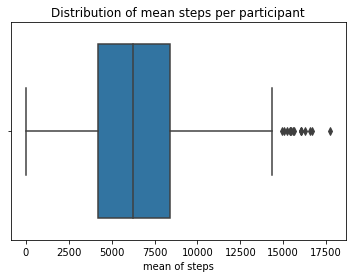

In [111]:
sns.boxplot(clean_data["mean_of_steps"])
plt.xlabel("mean of steps")
plt.title("Distribution of mean steps per participant")

Text(0.5, 1.0, 'Distribution of mean steps per participant')

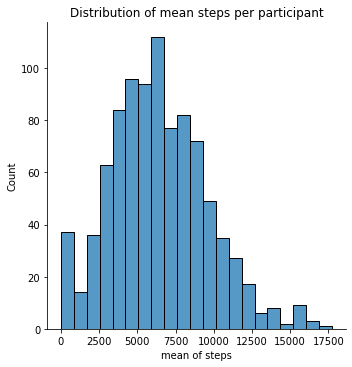

In [112]:
sns.displot(clean_data["mean_of_steps"])
plt.xlabel("mean of steps")
plt.title("Distribution of mean steps per participant")

There are some outliers that have more than 15000 mean step value

c:\Users\amoosi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of mean steps per participant')

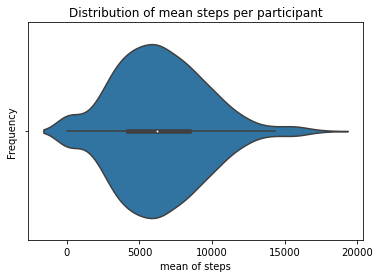

In [113]:
sns.violinplot(clean_data["mean_of_steps"])
plt.xlabel("mean of steps")
plt.ylabel("Frequency")
plt.title("Distribution of mean steps per participant")

In [114]:
clean_data['mean_of_steps'].describe()

count      924.000000
mean      6401.994195
std       3169.627665
min          0.000000
25%       4201.477885
50%       6232.280517
75%       8394.654867
max      17739.842105
Name: mean_of_steps, dtype: float64

c:\Users\amoosi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of mean step by age')

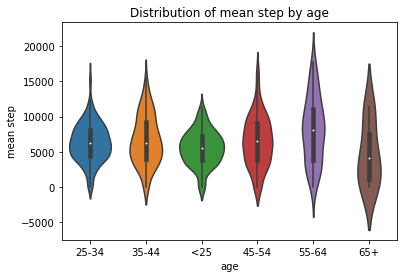

In [115]:
sns.violinplot(clean_data["age"], clean_data["mean_of_steps"])
plt.ylabel("mean step")
plt.title("Distribution of mean step by age")

c:\Users\amoosi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of mean step by age')

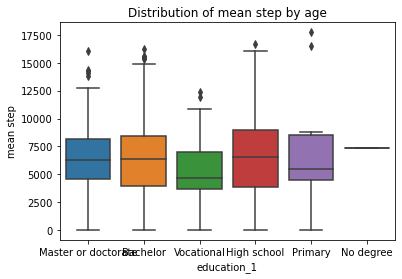

In [116]:
sns.boxplot(clean_data["education_1"], clean_data["mean_of_steps"])
plt.ylabel("mean step")
plt.title("Distribution of mean step by age")

c:\Users\amoosi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of mean step by age')

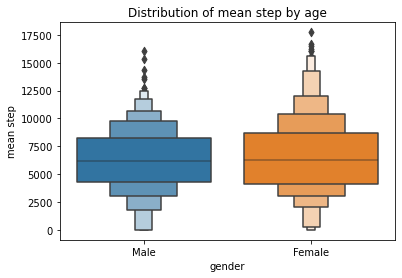

In [117]:
sns.boxenplot(clean_data["gender"], clean_data["mean_of_steps"])
plt.ylabel("mean step")
plt.title("Distribution of mean step by age")

In [118]:
nume_data = clean_data[['height', 'weight', 'mean_of_steps']]


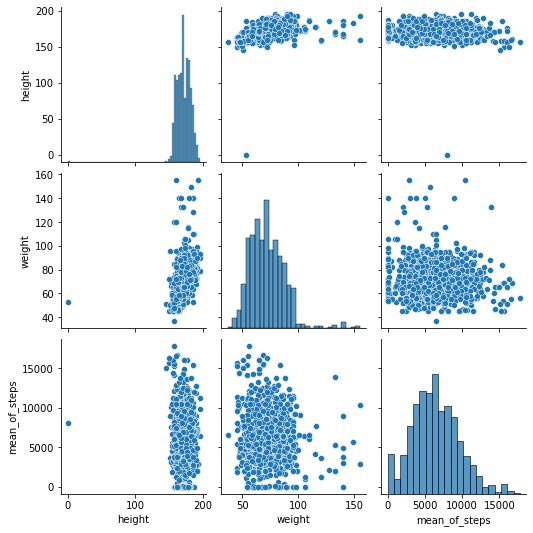

In [119]:
sns.pairplot(nume_data)

In [120]:
nume_data_corr = nume_data.corr()

Text(0.5, 1.0, 'The corrilation between the numerical values and mean step')

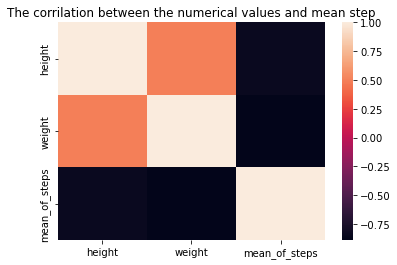

In [121]:
sns.heatmap(nume_data_corr.corr())
plt.title("The corrilation between the numerical values and mean step")

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [123]:
# encoding categorical columns
new_data = pd.get_dummies(clean_data, columns=['gender', 
                                                'education_1', 
                                                'age',
                                                'city'])

In [124]:
X = new_data.drop("mean_of_steps", axis=1)
y = new_data["mean_of_steps"]

In [125]:
# Spliting the dataset to training and testing set to evaluate model
Xtrain, Xtest, ytrain, ytest = train_test_split(X,  y, test_size=0.3, random_state=104) 


In [126]:
lrm = LinearRegression()
lrm.fit(Xtrain, ytrain)

LinearRegression()

In [127]:
predicted = lrm.predict(Xtest)

In [128]:
print((r2_score(ytest, predicted)))
print(mean_squared_error(ytest, predicted))

0.33658228353043607
6581197.305655302


In [129]:
from sklearn.preprocessing import MinMaxScaler

In [130]:
# Scaling the values
scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

In [131]:
lrm = LinearRegression()
lrm.fit(Xtrain_scaled, ytrain)

LinearRegression()

In [132]:
predicted = lrm.predict(Xtest_scaled)


In [133]:
print((r2_score(ytest, predicted)))
print(mean_squared_error(ytest, predicted))


0.337153080824134
6575534.916005308
